In [9]:
import sys
import importlib

# Ensure correct path is present
src_path = '/home/ishan/projects/Projects/Ethics/src'
if src_path not in sys.path:
    sys.path.append(src_path)

# Force reload the module to clear any stale cache
if 'explainability' in sys.modules:
    del sys.modules['explainability']

# Now import
from explainability import ModelExplainer

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [10]:
# Load data
loan_data = pd.read_csv('../data/loan_dataset_with_gender_bias.csv')
X = loan_data[['age', 'income', 'credit_score']]
y = loan_data['approved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

print(f"Model accuracy: {model.score(X_test, y_test):.3f}")

Model accuracy: 0.713


In [11]:
# Cell 2: Initialize explainer and test
# Create explainer
explainer = ModelExplainer(model, X_train, model_type='linear')

# Test individual explanation
sample = X_test.iloc[0:1]
explanation = explainer.explain_prediction(sample)

print("Individual prediction explanation:")
print(f"Prediction: {explanation['prediction'][0]}")
print(f"Probability: {explanation['prediction_proba'][0][1]:.3f}")
print(f"Feature importance: {explanation['feature_importance']}")


Initialized linear explainer successfully
Error plotting explanation: waterfall() got multiple values for argument 'show'
Individual prediction explanation:
Prediction: 1
Probability: 0.999
Feature importance: {'age': np.float64(0.2887888492337301), 'income': np.float64(0.27699497556409164), 'credit_score': np.float64(5.572518760976003)}


<Figure size 1000x400 with 0 Axes>

In [12]:
# Cell 2: Initialize explainer and test
# Create explainer
explainer = ModelExplainer(model, X_train, model_type='linear')

# Test individual explanation
sample = X_test.iloc[0:1]
explanation = explainer.explain_prediction(sample)

print("Individual prediction explanation:")
print(f"Prediction: {explanation['prediction'][0]}")
print(f"Probability: {explanation['prediction_proba'][0][1]:.3f}")
print(f"Feature importance: {explanation['feature_importance']}")


Initialized linear explainer successfully
Error plotting explanation: waterfall() got multiple values for argument 'show'
Individual prediction explanation:
Prediction: 1
Probability: 0.999
Feature importance: {'age': np.float64(0.2887888492337301), 'income': np.float64(0.27699497556409164), 'credit_score': np.float64(5.572518760976003)}


<Figure size 1000x400 with 0 Axes>

In [13]:
# Cell 3: Generate text explanation
text_explanation = explainer.generate_text_explanation(sample)
print("Human-readable explanation:")
print(text_explanation)


Human-readable explanation:
This loan application was approved (confidence: 99.9%).

Key factors influencing this decision:
1. Credit Score: 850.0 (increased approval likelihood)
2. Age: 40.0 (increased approval likelihood)
3. Income: 58731.0 (increased approval likelihood)



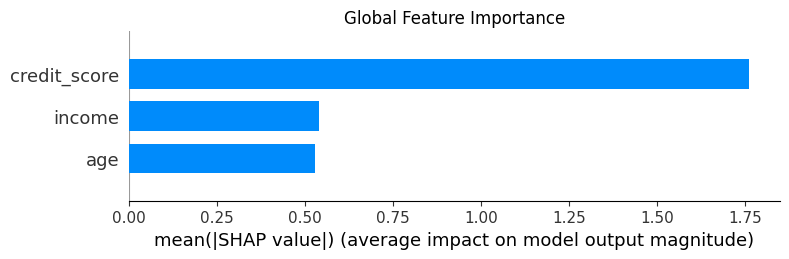

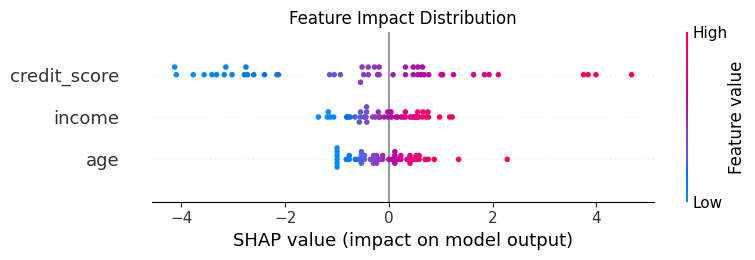

Global explanation completed - check the plots above


In [14]:
# Cell 4: Global explanation
global_explanation = explainer.global_explanation(X_test, max_samples=50)
print("Global explanation completed - check the plots above")
